In [9]:
import pickle as pkl
import pprint

pkl_dataSet = open('data/final_project_dataset.pkl','rb')
dataSet = pkl.load(pkl_dataSet)
dataSet.pop('TOTAL',0)
pprint.pprint(dataSet)
pkl_dataSet.close()

{'ALLEN PHILLIP K': {'bonus': 4175000,
                     'deferral_payments': 2869717,
                     'deferred_income': -3081055,
                     'director_fees': 'NaN',
                     'email_address': 'phillip.allen@enron.com',
                     'exercised_stock_options': 1729541,
                     'expenses': 13868,
                     'from_messages': 2195,
                     'from_poi_to_this_person': 47,
                     'from_this_person_to_poi': 65,
                     'loan_advances': 'NaN',
                     'long_term_incentive': 304805,
                     'other': 152,
                     'poi': False,
                     'restricted_stock': 126027,
                     'restricted_stock_deferred': -126027,
                     'salary': 201955,
                     'shared_receipt_with_poi': 1407,
                     'to_messages': 2902,
                     'total_payments': 4484442,
                     'total_stock_value': 17295

 'ELLIOTT STEVEN': {'bonus': 350000,
                    'deferral_payments': 'NaN',
                    'deferred_income': -400729,
                    'director_fees': 'NaN',
                    'email_address': 'steven.elliott@enron.com',
                    'exercised_stock_options': 4890344,
                    'expenses': 78552,
                    'from_messages': 'NaN',
                    'from_poi_to_this_person': 'NaN',
                    'from_this_person_to_poi': 'NaN',
                    'loan_advances': 'NaN',
                    'long_term_incentive': 'NaN',
                    'other': 12961,
                    'poi': False,
                    'restricted_stock': 1788391,
                    'restricted_stock_deferred': 'NaN',
                    'salary': 170941,
                    'shared_receipt_with_poi': 'NaN',
                    'to_messages': 'NaN',
                    'total_payments': 211725,
                    'total_stock_value': 6678735},
 'FALLON JA

                     'from_poi_to_this_person': 0,
                     'from_this_person_to_poi': 0,
                     'loan_advances': 'NaN',
                     'long_term_incentive': 'NaN',
                     'other': 'NaN',
                     'poi': False,
                     'restricted_stock': 161602,
                     'restricted_stock_deferred': 'NaN',
                     'salary': 'NaN',
                     'shared_receipt_with_poi': 127,
                     'to_messages': 672,
                     'total_payments': 'NaN',
                     'total_stock_value': 221141},
 'MORDAUNT KRISTINA M': {'bonus': 325000,
                         'deferral_payments': 'NaN',
                         'deferred_income': 'NaN',
                         'director_fees': 'NaN',
                         'email_address': 'kristina.mordaunt@enron.com',
                         'exercised_stock_options': 'NaN',
                         'expenses': 35018,
                        

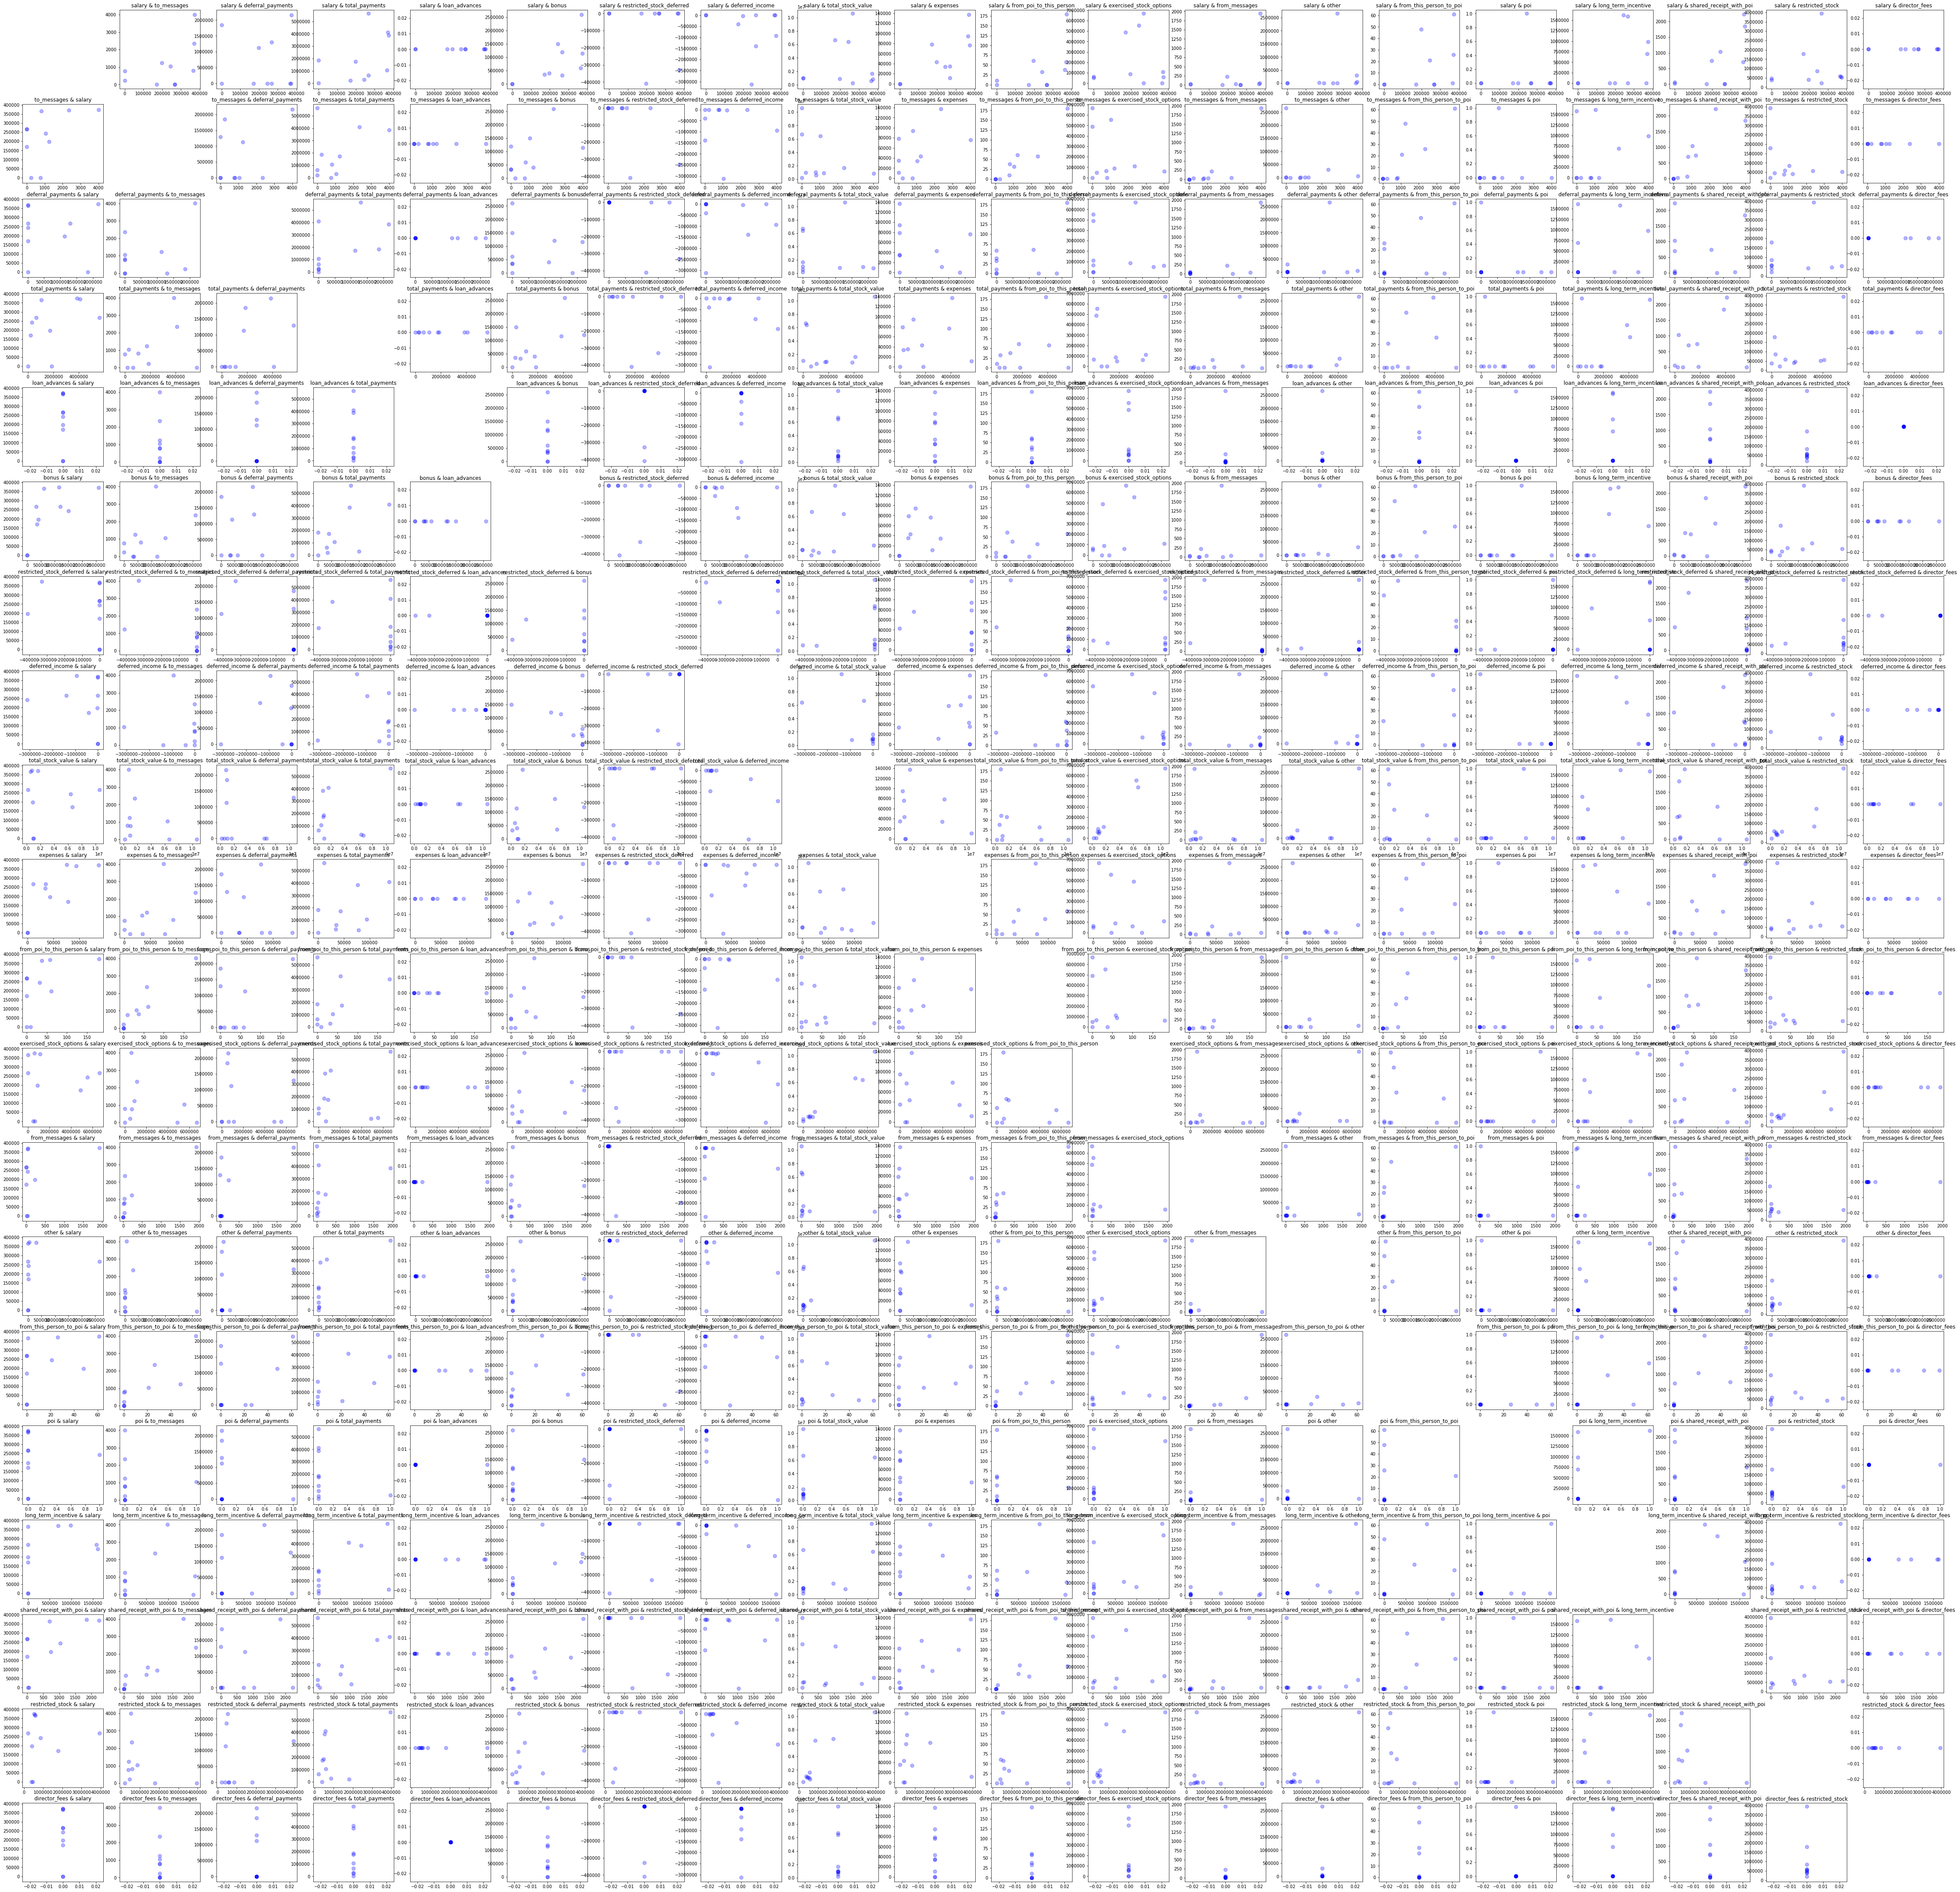

In [67]:
import matplotlib.pyplot as plt

# 绘制所有属性的关系
# for name in dataSet.keys():
#     keys = ''
#     for keyD in dataSet[name].keys():
        
#         keys=keys+",\""+keyD+"\""
#     print(keys)
#     break

dataSets_arr = []
titles = ["salary","to_messages","deferral_payments","total_payments","loan_advances","bonus","restricted_stock_deferred","deferred_income","total_stock_value","expenses","from_poi_to_this_person","exercised_stock_options","from_messages","other","from_this_person_to_poi","poi","long_term_incentive","shared_receipt_with_poi","restricted_stock","director_fees"]
for name in dataSet.keys():
    dataSets_temp = [0 for n in range(len(titles))]
    for keyD in dataSet[name].keys():
        if keyD not in titles:
            continue
        ind = titles.index(keyD)
        valueD = dataSet[name][keyD]
        if valueD == 'NaN':
            valueD = 0
        dataSets_temp[ind] = valueD
    dataSets_arr.append(dataSets_temp)
# pprint.pprint(dataSets_arr)

def printScatter(dataSet,index1,index2):
    for i in range(10):
        plt.scatter(dataSets_arr[i][index1],dataSets_arr[i][index2],s=70,c='b',alpha=0.3)


figNum = 0
figX = len(titles)
plt.figure(figsize=(80,80))
for i in range(figX):
    for j in range(figX):
        figNum = figNum+1
        if i == j:
            continue
        plt.subplot(figX,figX,figNum)
        printScatter(dataSets_arr,i,j)
        plt.title(titles[i]+' & '+titles[j])

plt.show()

In [70]:
features = [] # 挑选出两个属性：“salary”、“exercised_stock_options”
traget = [] # 类别：“poi”
for name in dataSet.keys():
    salary = dataSet[name]["bonus"]
    stock = dataSet[name]["total_payments"]
    payments = dataSet[name]["total_payments"]
    poi = dataSet[name]["poi"]
    
    if salary == 'NaN' or stock == 'NaN'or salary == 'NaN':
        continue
    feature = []
    feature.append(salary)
    feature.append(stock)
#     feature.append(payments)
    features.append(feature)
    traget.append(poi)




[  8000000 103559793]
[ 70000 211725]


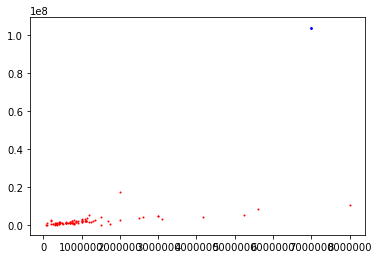

In [71]:
import matplotlib.pyplot as plt
import random
import numpy as np

# 散点图
# for i in range(len(traget)):
#     plt.scatter(features[i][0],features[i][1],c='b',alpha=0.5)

# k-means
# 重复
def kmeansCal(features,k,times):
    kCenter = [] #K 个点
    feature_np = np.array(features)
    rowCount = feature_np.shape[0]
    colCount = feature_np.shape[1]
    maxFeature = feature_np.max(axis=0)
    minFeature = feature_np.min(axis=0)
    print(maxFeature)
    print(minFeature)
    # 0-1 归一化
#     for j in range(colCount):
#         maxValue = maxFeature[j]
#         minValue = minFeature[j]
#         for i in range(rowCount):
#             feature_np[i][j] = (feature_np[i][j] - minValue)/(maxValue-minValue)
    # 随机选取k个点
    for kI in range(k):
        tempCenter = []
        for col in range(colCount):
            colTemp = random.uniform(minFeature[col],maxFeature[col])
            tempCenter.append(colTemp)
        kCenter.append(tempCenter)
    kCenter_np = np.array(kCenter)
    
    resPoint = []
    for i in range(times):
        resPoint = [[] for i in range(k)]
        for row in range(rowCount):
            # 计算每个对象到随机中心点的距离
            diffArr = (feature_np[row]-kCenter_np)
            fars = (diffArr*diffArr).sum(axis=1)
            # 对象属于最近的中心点
            fea = fars.argmax(axis=0)
            resPoint[fea].append(feature_np[row])
        # 计算每个cluster的中心，重置中心点
        for kI in range(k):
            tempPoints = resPoint[kI]
            if len(tempPoints) > 0:
                centerTemp = np.average(tempPoints,axis=0)
                kCenter_np[kI] = centerTemp
    return (kCenter_np,resPoint)
    
res_np,resPoint = kmeansCal(features,2,50)
cols = ['r','b']
for name in range(len(resPoint)):
    tempPoints = resPoint[name]
    for pt in range(len(tempPoints)):
        plt.scatter(tempPoints[pt][0],tempPoints[pt][1],s=1,c=cols[name],alpha=1)
plt.scatter(res_np[0][0],res_np[0][1],s=3,c='r',alpha=1)
plt.scatter(res_np[1][0],res_np[1][1],s=3,c='b',alpha=1)
plt.show()

In [8]:
import os

os.system('pwd')

0